# Test of pytorch with iris dataset

In [16]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
import pandas as pd
from matplotlib.animation import FuncAnimation
import pandas as pd
%matplotlib inline

sns.set_style(style = 'whitegrid')
plt.rcParams["patch.force_edgecolor"] = True

In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
if torch.cuda.is_available(): 
 dev = "cuda:0" 
else: 
 dev = "cpu" 
device = torch.device("cpu")

In [4]:
torch.set_default_dtype(torch.float64)
torch.set_default_device(device)

# Tensors
## Vectors


In [5]:
x = torch.FloatTensor([12,43,25,1,532,25,3,5,12,4,24,32,41])
print(x)

tensor([ 12.,  43.,  25.,   1., 532.,  25.,   3.,   5.,  12.,   4.,  24.,  32.,
         41.], dtype=torch.float32)


In [6]:
x.size()

torch.Size([13])

## Matrix

In [7]:
boston = datasets.load_boston()

C:\Users\yash\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [8]:
data = torch.from_numpy(boston.data).to(device)
target = torch.from_numpy(boston.target).to(device)

In [9]:
data.size()

torch.Size([506, 13])

# Creating a basic NN

In [10]:
df = pd.DataFrame(boston.data,columns=boston.feature_names)

In [11]:
import torch
import torch.nn as nn
from tqdm import tqdm

In [12]:
n_in = 13
n_h =5
n_out  = 1
batch_size = 32

## Creating the model

In [13]:
model = nn.Sequential(nn.Linear(n_in,n_h),
                      nn.ReLU(),
                      nn.Linear(n_h,n_h*4),
                      nn.ReLU(),
                      nn.Linear(n_h*4,n_h*2),
                      nn.ReLU(),
                      nn.Linear(n_h*2,n_h),
                      nn.ReLU(),
                      nn.Linear(n_h,n_h),
                      nn.ReLU(),
                      nn.Linear(n_h,n_out),
                      nn.Sigmoid())

In [14]:
lossfn = nn.MSELoss()

optimiser = torch.optim.SGD(model.parameters() , lr = 0.001)

In [15]:
import time

start = time.time()
epochs = 5000
for epoch in tqdm(range(epochs)):
    y_pred = model(data)
    loss = lossfn(y_pred ,target)
    # print(f"{epoch = } , {loss.item() = }  ",end="\r")
    optimiser.zero_grad()
    
    loss.backward()
    
    optimiser.step()

print(f"{time.time()-start = }")

  0%|                                                                                         | 0/5000 [00:00<?, ?it/s]C:\Users\yash\anaconda3\lib\site-packages\torch\utils\_device.py:62: UserWarning: Using a target size (torch.Size([506])) that is different to the input size (torch.Size([506, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return func(*args, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:30<00:00, 162.17it/s]

time.time()-start = 30.83999729156494



   above training could be considered random almost but lets try again using the new  techniques

## Creating a functional NN

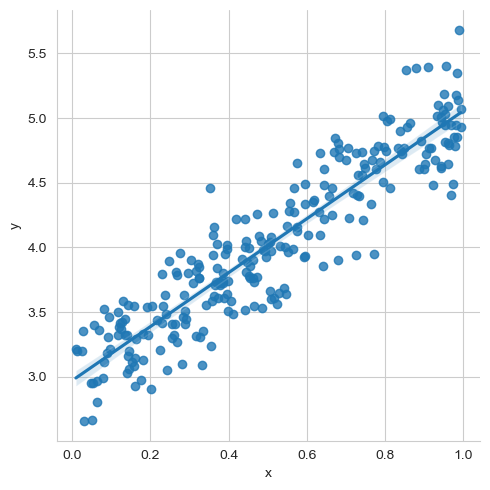

In [18]:
m = 2 # slope
c = 3 # intercept
x = np.random.rand(256)

noise = np.random.randn(256) / 4

y = x * m + c + noise

df = pd.DataFrame()
df['x'] = x
df['y'] = y

sns.lmplot(x ='x', y ='y', data = df)

In [20]:
import torch
from torch import nn
from torch.autograd import Variable

In [21]:
x_train = x.reshape(-1, 1).astype('float64')
y_train = y.reshape(-1, 1).astype('float64')

In [23]:
class LeniearRegressor(nn.Module):
    def __init__(self,inputDim,outputDim):
        super(LeniearRegressor,self).__init__()
        self.leniear = nn.Linear(inputDim,outputDim)
        
    def forward(self,x):
        out = self.leniear(x)
        return out
    


In [25]:
input_dim = x_train.shape[1]
output_dim = y_train.shape[1]


In [27]:
model = LeniearRegressor(input_dim,output_dim)
criterion = nn.MSELoss()

In [28]:
[w,b] = model.parameters()

In [30]:
def getParamVals():
    return w.data[0][0],b.data[0]

In [39]:

def plot_current_fit(title = ""):
    plt.figure(figsize = (12,4))
    plt.title(title)
    plt.scatter(x, y, s = 8)
    w1 = w.data[0][0]
    b1 = b.data[0]
    x1 = np.array([0., 1.])
    y1 = torch.from_numpy( x1) * w1 + b1
    plt.plot(x1, y1, 'r', label = 'Current Fit ({:.3f}, {:.3f})'.format(w1, b1))
    plt.xlabel('x (input)')
    plt.ylabel('y (target)')
    plt.legend()
    plt.show()


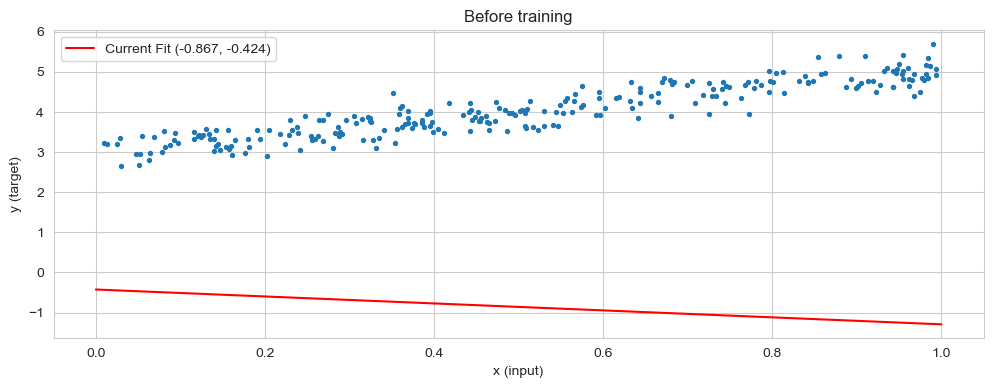

In [40]:
    plot_current_fit('Before training')